## Ammonia excretion phenotype in Azotobacter vinelandii
Recently, major advances in understanding the regulation of nitrogen fixation has led to A.v. strain to export ammonia to very high rates. This is due to a mutation in the repressor gene nifL which can export up to 3 mmol of ammonia /hr/gCDW [(Plunkett et al)](https://microbialcellfactories.biomedcentral.com/articles/10.1186/s12934-020-01362-9) with a maximum supernatant ammonia concentration up to 15 mmol! During exponential phase little ammonia is being produced but at staionary phase most of the ammonia is being produced. We dont not have accurate uptake and growth rates under maximum ammonia excretion conditions and stationary phase also has a large set of assumptions not accounted for in the model. But we can use what we have learned in developing our model to understand the cost of ammonia excretion and how A. vinelandii can adapt to the increased energy demand. 

In [3]:
import cobra.test
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import numpy as np
import seaborn as sns
import os
import math
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.io import save_json_model

Lets run an ammonia excreting model at high and low aeration conditions with an export of 3 mmol of ammonia. In this first test we will use RNF as the feredoxin source. 

In [3]:
nitrogen = ["N2", "N2", "NH4", "NH4", "nifL", "nifL"]
oxygen = ["low", "high", "low", "high", "low", "high"]

cond = []
O2_rate = []
NH4_rate = []
Growth_rate = []
suc_rate = []
nit_rate = []


for n, o in zip(nitrogen, oxygen):




    model = cobra.io.load_json_model("../Data/Models/iAA1300_C.json")

    model.reactions.get_by_id("EX_glc__D_e").lower_bound = 0
    model.reactions.get_by_id("EX_glc__D_e").upper_bound = 0

    # set the flux to zero of corresponding reactions in pathway of interest
    model.reactions.get_by_id("CYOO2pp").upper_bound = 0
    model.reactions.get_by_id("CYOO2pp").lower_bound = 0

    model.reactions.get_by_id("NADH6").upper_bound = 0
    model.reactions.get_by_id("NADH6").lower_bound = 0

    model.reactions.get_by_id("FIX").upper_bound = 0
    model.reactions.get_by_id("FIX").lower_bound = 0

    if n == "N2":

        model.reactions.get_by_id("EX_nh4_e").lower_bound = 0
        model.reactions.get_by_id("EX_nh4_e").upper_bound = 0
        print("Model is diazotropic")
        
    elif n == "nifL":
        model.reactions.get_by_id("EX_nh4_e").lower_bound = 3
        model.reactions.get_by_id("EX_nh4_e").upper_bound = 3
        print("Model is ammonia excreting")
        
    else:
        model.reactions.get_by_id("EX_nh4_e").lower_bound = -1000
        model.reactions.get_by_id("EX_nh4_e").upper_bound = 0
        print("Model is ammonia assimilating")


    if o == "low":

        model.reactions.get_by_id("EX_sucr_e").lower_bound = -4
        model.reactions.get_by_id("EX_sucr_e").upper_bound = -4

        # Set ATPM to theoretical derived
        model.reactions.get_by_id("ATPM").upper_bound = 1000
        model.reactions.get_by_id("ATPM").lower_bound = 16
        print("Low oxygen")
        
    else:

        model.reactions.get_by_id("EX_sucr_e").lower_bound = -9
        model.reactions.get_by_id("EX_sucr_e").upper_bound = -9

        # Set ATPM to theoretical derived
        model.reactions.get_by_id("ATPM").upper_bound = 1000
        model.reactions.get_by_id("ATPM").lower_bound = 110
        print("High oxygen")

    sol = model.optimize()
    Growth_rate.append(sol.objective_value)
    NH4_rate.append(sol.fluxes['EX_nh4_e'])
    O2_rate.append(sol.fluxes['O2tpp'])
    suc_rate.append(sol.fluxes['EX_sucr_e'])
    nit_rate.append(sol.fluxes['NIT1b'])
    cond.append("{}_{}".format(n,o))

ammonia_data = pd.DataFrame([cond, Growth_rate, NH4_rate, O2_rate, suc_rate, nit_rate])
ammonia_data = ammonia_data.transpose()
ammonia_data.columns = ["Condition", "Growth_rate", "Ammonia exchange", "Respiration rate", "Sucrose uptake", "Nitrogenase rate"]

ammonia_data
    

Model is diazotropic
Low oxygen
Model is diazotropic
High oxygen
Model is ammonia assimilating
Low oxygen
Model is ammonia assimilating
High oxygen
Model is ammonia excreting
Low oxygen
Model is ammonia excreting
High oxygen


,Condition,Growth_rate,Ammonia exchange,Respiration rate,Sucrose uptake,Nitrogenase rate
0,N2_low,0.195226,0.0,38.305953,-4.0,1.020797
1,N2_high,0.178744,0.0,99.124385,-9.0,0.934615
2,NH4_low,0.33325,-3.484996,34.066037,-4.0,0.0
3,NH4_high,0.305115,-3.190771,95.242429,-9.0,0.0
4,nifL_low,0.07641,3.0,41.955814,-4.0,1.899533
5,nifL_high,0.059928,3.0,102.774246,-9.0,1.813351


Lets try with Fix as the main producer of Ferredoxin

In [4]:
nitrogen = ["N2", "N2", "NH4", "NH4", "nifL", "nifL"]
oxygen = ["low", "high", "low", "high", "low", "high"]

cond = []
O2_rate = []
NH4_rate = []
Growth_rate = []
suc_rate = []
nit_rate = []


for n, o in zip(nitrogen, oxygen):




    model = cobra.io.load_json_model("../Data/Models/iAA1300_C.json")

    model.reactions.get_by_id("EX_glc__D_e").lower_bound = 0
    model.reactions.get_by_id("EX_glc__D_e").upper_bound = 0

    # set the flux to zero of corresponding reactions in pathway of interest
    model.reactions.get_by_id("CYOO2pp").upper_bound = 0
    model.reactions.get_by_id("CYOO2pp").lower_bound = 0

    model.reactions.get_by_id("NADH6").upper_bound = 0
    model.reactions.get_by_id("NADH6").lower_bound = 0

    model.reactions.get_by_id("RNF").upper_bound = 0
    model.reactions.get_by_id("RNF").lower_bound = 0

    if n == "N2":

        model.reactions.get_by_id("EX_nh4_e").lower_bound = 0
        model.reactions.get_by_id("EX_nh4_e").upper_bound = 0
        print("Model is diazotropic")
        
    elif n == "nifL":
        model.reactions.get_by_id("EX_nh4_e").lower_bound = 3
        model.reactions.get_by_id("EX_nh4_e").upper_bound = 3
        print("Model is ammonia excreting")
        
    else:
        model.reactions.get_by_id("EX_nh4_e").lower_bound = -1000
        model.reactions.get_by_id("EX_nh4_e").upper_bound = 0
        print("Model is ammonia assimilating")


    if o == "low":

        model.reactions.get_by_id("EX_sucr_e").lower_bound = -4
        model.reactions.get_by_id("EX_sucr_e").upper_bound = -4

        # Set ATPM to theoretical derived
        model.reactions.get_by_id("ATPM").upper_bound = 1000
        model.reactions.get_by_id("ATPM").lower_bound = 16
        print("Low oxygen")
        
    else:

        model.reactions.get_by_id("EX_sucr_e").lower_bound = -9
        model.reactions.get_by_id("EX_sucr_e").upper_bound = -9

        # Set ATPM to theoretical derived
        model.reactions.get_by_id("ATPM").upper_bound = 1000
        model.reactions.get_by_id("ATPM").lower_bound = 110
        print("High oxygen")

    sol = model.optimize()
    Growth_rate.append(sol.objective_value)
    NH4_rate.append(sol.fluxes['EX_nh4_e'])
    O2_rate.append(sol.fluxes['O2tpp'])
    suc_rate.append(sol.fluxes['EX_sucr_e'])
    nit_rate.append(sol.fluxes['NIT1b'])
    cond.append("{}_{}".format(n,o))

ammonia_data = pd.DataFrame([cond, Growth_rate, NH4_rate, O2_rate, suc_rate, nit_rate])
ammonia_data = ammonia_data.transpose()
ammonia_data.columns = ["Condition", "Growth_rate", "Ammonia exchange", "Respiration rate", "Sucrose uptake", "Nitrogenase rate"]

ammonia_data

Model is diazotropic
Low oxygen
Model is diazotropic
High oxygen
Model is ammonia assimilating
Low oxygen
Model is ammonia assimilating
High oxygen
Model is ammonia excreting
Low oxygen
Model is ammonia excreting
High oxygen


,Condition,Growth_rate,Ammonia exchange,Respiration rate,Sucrose uptake,Nitrogenase rate
0,N2_low,0.219465,0.0,37.10234,-4.0,1.147539
1,N2_high,0.200936,0.0,98.022389,-9.0,1.050657
2,NH4_low,0.33325,-3.484996,34.066037,-4.0,0.0
3,NH4_high,0.305115,-3.190771,95.242429,-9.0,0.0
4,nifL_low,0.121515,3.0,39.716091,-4.0,2.135379
5,nifL_high,0.102987,3.0,100.636139,-9.0,2.038497


Lets play with this effect of ammonia excretion and difference in growth rates between RNF and FIX....

An overall trend in the data shows that an increase in energy for N2 fixation the more "coupled" pathway as well as the Fix enzymes might be preferred. From the maintenance data we can see that Rnf minimizes the total maintenance and allows for more O2 consumed per unit carbon compared to Fix. While that is advantageous in high oxygen "decoupling mode" when you need more flux to nitrogenase the Rnf mechanism will not work as well. This is what I think we are seeing above when we increase the ammonia excretion the Rnf condition is more effected than Fix only. 

This is the realtionship between the amount of electron flux to N2 compared to the electron flux to O2. We can test this by slowly increasing the ammonia excretion and determineing the $\frac{e^- to N_2}{e^- to O_2}$. All NADH through Fix/2 or Rnf is electron to N2. All electrons through QH2 is electrons to O2. 

First lets just graph growth rates against ammonia excretion for both RNF and FIX.

In [2]:
nitrogen = ["N2", "N2", "NH4", "NH4", "nifL", "nifL"]
oxygen = ["low", "high", "low", "high", "low", "high"]

cond = []
O2_rate = []
NH4_rate = []
Growth_rate = []
suc_rate = []
nit_rate = []


for n, o in zip(nitrogen, oxygen):




    model = cobra.io.load_json_model("../Data/Models/iAA1300_C.json")

    model.reactions.get_by_id("EX_glc__D_e").lower_bound = 0
    model.reactions.get_by_id("EX_glc__D_e").upper_bound = 0

    # set the flux to zero of corresponding reactions in pathway of interest
    model.reactions.get_by_id("CYOO2pp").upper_bound = 0
    model.reactions.get_by_id("CYOO2pp").lower_bound = 0

    model.reactions.get_by_id("RNF").upper_bound = 0
    model.reactions.get_by_id("RNF").lower_bound = 0

    if n == "N2":

        model.reactions.get_by_id("EX_nh4_e").lower_bound = 0
        model.reactions.get_by_id("EX_nh4_e").upper_bound = 0
        print("Model is diazotropic")
        
    elif n == "nifL":
        model.reactions.get_by_id("EX_nh4_e").lower_bound = 3
        model.reactions.get_by_id("EX_nh4_e").upper_bound = 3
        print("Model is ammonia excreting")
        
    else:
        model.reactions.get_by_id("EX_nh4_e").lower_bound = -1000
        model.reactions.get_by_id("EX_nh4_e").upper_bound = 0
        print("Model is ammonia assimilating")


    if o == "low":

        model.reactions.get_by_id("EX_sucr_e").lower_bound = -4
        model.reactions.get_by_id("EX_sucr_e").upper_bound = -4

        # Set ATPM to theoretical derived
        model.reactions.get_by_id("ATPM").upper_bound = 1000
        model.reactions.get_by_id("ATPM").lower_bound = 16
        print("Low oxygen")
        
    else:

        model.reactions.get_by_id("EX_sucr_e").lower_bound = -9
        model.reactions.get_by_id("EX_sucr_e").upper_bound = -9

        # Set ATPM to theoretical derived
        model.reactions.get_by_id("ATPM").upper_bound = 1000
        model.reactions.get_by_id("ATPM").lower_bound = 110
        print("High oxygen")

    sol = model.optimize()
    Growth_rate.append(sol.objective_value)
    NH4_rate.append(sol.fluxes['EX_nh4_e'])
    O2_rate.append(sol.fluxes['O2tpp'])
    suc_rate.append(sol.fluxes['EX_sucr_e'])
    nit_rate.append(sol.fluxes['NIT1b'])
    cond.append("{}_{}".format(n,o))

ammonia_data = pd.DataFrame([cond, Growth_rate, NH4_rate, O2_rate, suc_rate, nit_rate])
ammonia_data = ammonia_data.transpose()
ammonia_data.columns = ["Condition", "Growth_rate", "Ammonia exchange", "Respiration rate", "Sucrose uptake", "Nitrogenase rate"]

ammonia_data

Model is diazotropic
Low oxygen
Model is diazotropic
High oxygen
Model is ammonia assimilating
Low oxygen
Model is ammonia assimilating
High oxygen
Model is ammonia excreting
Low oxygen
Model is ammonia excreting
High oxygen


,Condition,Growth_rate,Ammonia exchange,Respiration rate,Sucrose uptake,Nitrogenase rate
0,N2_low,0.328202,0.0,31.702955,-4.0,1.716103
1,N2_high,0.520189,0.0,82.169717,-9.0,2.719967
2,NH4_low,0.521071,-5.449154,26.2128,-4.0,0.0
3,NH4_high,0.825881,-8.636731,73.468,-9.0,0.0
4,nifL_low,0.222019,3.0,34.725529,-4.0,2.660893
5,nifL_high,0.414006,3.0,85.19229,-9.0,3.664757


In [4]:
#use parts of the maintenance functions for ammoniaexcretion

def ammonia_excretion(Model, Reactions, lb, ub, interval):
 


    # create array of testable bounds
    NH4_exc = np.linspace(lb, ub, interval).tolist()
    NH4_exc.reverse()
    NH4_exc_value = []
    Growth_rate = []
    react = []

    for j in Reactions:
        model = cobra.io.load_json_model(Model)

        # Make sure glucose is set to zero
        model.reactions.get_by_id("EX_glc__D_e").lower_bound = 0
        model.reactions.get_by_id("EX_glc__D_e").upper_bound = 0
      
        model.reactions.get_by_id("ATPM").upper_bound = 1000
        model.reactions.get_by_id("ATPM").lower_bound = 110
       
        # Make sure model is diazotrophic
        

        # set the flux to zero of corresponding reactions in pathway of interest
        model.reactions.get_by_id("CYOO2pp").upper_bound = 0
        model.reactions.get_by_id("CYOO2pp").lower_bound = 0

        model.reactions.get_by_id("NADH6").upper_bound = 0
        model.reactions.get_by_id("NADH6").lower_bound = 0

        model.reactions.get_by_id(j).upper_bound = 0
        model.reactions.get_by_id(j).lower_bound = 0

        # Set sucrose uptake to maintenance coefficient
        model.reactions.get_by_id("EX_sucr_e").lower_bound = -9
        model.reactions.get_by_id("EX_sucr_e").upper_bound = -9


        # This takes some time so nice to know what step its on
        print(f'Running ammonia excretion without {j}')

        for i in NH4_exc:
          
            
            model.reactions.get_by_id("EX_nh4_e").lower_bound = i
            model.reactions.get_by_id("EX_nh4_e").upper_bound = i
            solution = model.optimize()
            
            NH4_exc_value.append(i)
            Growth_rate.append(solution.objective_value)
            react.append(j)

    # Make data frame
    df = pd.DataFrame({
        'Reaction Deletion': react,
        'Ammonia excreted': NH4_exc_value,
        'Growth_Rate': Growth_rate})



    # save to csv with details on which path an which conditions were used

    df.to_csv('../Data/ammonia/excretionrates_Rnf_vs_Fix.csv', sep=',', index=False)

    sns.lineplot(data = df, x = 'Ammonia excreted', y = 'Growth_Rate', hue = 'Reaction Deletion')


Running ammonia excretion without RNF
Running ammonia excretion without FIX


C:\Users\alexa\anaconda3\envs\Metabolic_models\lib\site-packages\cobra\util\solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


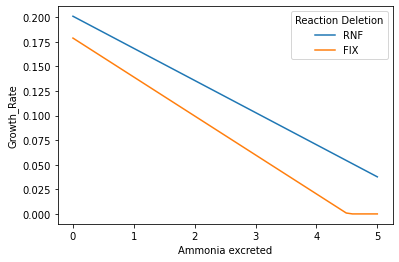

In [5]:
react_list = ["RNF", "FIX"]
ammonia_excretion("../Data/Models/iAA1300_C.json", react_list, 0, 5, 50  )

In [6]:
#code adapated from midnighter on github https://github.com/opencobra/cobrapy/issues/771
def metabolite_flux_balance(metabolite, solution):
    """
    Return a vector of reaction fluxes scaled by the stoichiometric coefficient.

    Parameters
    ----------
    metabolite : cobra.Metabolite
        The metabolite whose fluxes are to be investigated.
    solution : cobra.Solution
        Solution with flux values.

    Returns
    -------
    pandas.Series
        A vector with fluxes of reactions that consume or produce the given
        metabolite scaled by the corresponding stoichiometric coefficients. The
        reaction identifiers are given by the index.
    """
    rxn_ids = list()
    rxn_sub = list()
    adj_flux = list()
    for rxn in metabolite.reactions:
        coef = rxn.get_coefficient(metabolite)
        rxn_ids.append(rxn.id)
        rxn_sub.append(rxn.subsystem)
        adj_flux.append(coef * solution.fluxes[rxn.id])
    return pd.DataFrame({'Rxn_id': rxn_ids, 'Subsystem': rxn_sub, 'Adjusted_Flux': adj_flux})



#functions that will pull the total ATP produced and the ratio of ATPM/Total ATP from the above function
def total_flux(df):
    positive_num = df[(df.Adjusted_Flux > 0)]
    flux_total = positive_num['Adjusted_Flux'].sum()
    
    return flux_total

def flux_ratio(df, met_total, reaction):
    rxn_flux = df.loc[df['Rxn_id'] == reaction, 'Adjusted_Flux'].values[0]
    rxn_flux_ratio = (rxn_flux * -1)/flux_total
    
    return rxn_flux_ratio



    
    


In [7]:
#use parts of the maintenance functions for ammoniaexcretion

def reduction_ratio(Model, Reactions, lb, ub, interval):
 


    # create array of testable bounds
    NH4_exc = np.linspace(lb, ub, interval).tolist()
    NH4_exc.reverse()
    NH4_exc_value = []
    Growth_rate = []
    react = []
    O2_flux = []
    N2_flux = []

    for j in Reactions:
        model = cobra.io.load_json_model(Model)

        # Make sure glucose is set to zero
        model.reactions.get_by_id("EX_glc__D_e").lower_bound = 0
        model.reactions.get_by_id("EX_glc__D_e").upper_bound = 0
      
        model.reactions.get_by_id("ATPM").upper_bound = 1000
        model.reactions.get_by_id("ATPM").lower_bound = 110
       
        # Make sure model is diazotrophic
        

        # set the flux to zero of corresponding reactions in pathway of interest
        model.reactions.get_by_id("CYOO2pp").upper_bound = 0
        model.reactions.get_by_id("CYOO2pp").lower_bound = 0

        model.reactions.get_by_id("NADH6").upper_bound = 0
        model.reactions.get_by_id("NADH6").lower_bound = 0

        model.reactions.get_by_id(j).upper_bound = 0
        model.reactions.get_by_id(j).lower_bound = 0

        # Set sucrose uptake to maintenance coefficient
        model.reactions.get_by_id("EX_sucr_e").lower_bound = -9
        model.reactions.get_by_id("EX_sucr_e").upper_bound = -9


        # This takes some time so nice to know what step its on
        print(f'Running ammonia excretion without {j}')

        for i in NH4_exc:
          
            
            model.reactions.get_by_id("EX_nh4_e").lower_bound = i
            model.reactions.get_by_id("EX_nh4_e").upper_bound = i
            solution = model.optimize()
            O2_flux.append((solution.fluxes["O2tpp"]*2)) #We will normalize to NADH 2 NADH to reduce on O2
            N2_flux.append((solution.fluxes["NIT1b"]*8)) #We will normalize to NADH 8 NADH to reduce on O2
            NH4_exc_value.append(i)
            Growth_rate.append(solution.objective_value)
            react.append(j)

    # Make data frame
    df = pd.DataFrame({
        'Reaction Deletion': react,
        'Ammonia excreted': NH4_exc_value,
        'Growth_Rate': Growth_rate,
        'O2 Flux': O2_flux,
        'N2 Flux': N2_flux})

    df['N2/O2'] = df['N2 Flux']/df['O2 Flux']

    # save to csv with details on which path an which conditions were used

    df.to_csv('../Data/ammonia/reductionratio_Rnf_vs_Fix.csv', sep=',', index=False)

    ax = sns.lineplot(data = df, x = 'N2/O2', y = 'Growth_Rate', hue = 'Reaction Deletion')
    ax.set(xlabel='($e^-$ flux to $N_2$)/($e^-$ flux to $O_2$)', ylabel='Growth Rate ($\mu$)')
    ax.legend(frameon=False, title = "Deleted Reaction")
    plt.savefig("../Data/ammonia/reducitionratio_Rnf_vs_Fix.tiff", dpi= 60, format="tiff")
    


Running ammonia excretion without RNF
Running ammonia excretion without FIX


C:\Users\alexa\anaconda3\envs\Metabolic_models\lib\site-packages\cobra\util\solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


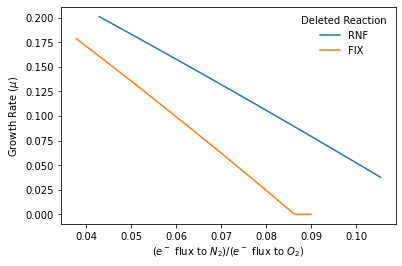

In [8]:
react_list = ["RNF", "FIX"]
reduction_ratio("../Data/Models/iAA1300_C.json", react_list, 0, 5, 50  )

In [9]:
#use parts of the maintenance functions for ammoniaexcretion

def reduction_ratio_NDHI(Model, Reactions, lb, ub, interval):
 


    # create array of testable bounds
    NH4_exc = np.linspace(lb, ub, interval).tolist()
    NH4_exc.reverse()
    NH4_exc_value = []
    Growth_rate = []
    react = []
    O2_flux = []
    N2_flux = []

    for j in Reactions:
        model = cobra.io.load_json_model(Model)

        # Make sure glucose is set to zero
        model.reactions.get_by_id("EX_glc__D_e").lower_bound = 0
        model.reactions.get_by_id("EX_glc__D_e").upper_bound = 0
      
        model.reactions.get_by_id("ATPM").upper_bound = 1000
        model.reactions.get_by_id("ATPM").lower_bound = 197
       
        # Make sure model is diazotrophic
        

        # set the flux to zero of corresponding reactions in pathway of interest
        model.reactions.get_by_id("CYOO2pp").upper_bound = 0
        model.reactions.get_by_id("CYOO2pp").lower_bound = 0

        model.reactions.get_by_id("NADH5").upper_bound = 0
        model.reactions.get_by_id("NADH5").lower_bound = 0

        model.reactions.get_by_id(j).upper_bound = 0
        model.reactions.get_by_id(j).lower_bound = 0

        # Set sucrose uptake to maintenance coefficient
        model.reactions.get_by_id("EX_sucr_e").lower_bound = -8
        model.reactions.get_by_id("EX_sucr_e").upper_bound = -8


        # This takes some time so nice to know what step its on
        print(f'Running ammonia excretion without {j}')

        for i in NH4_exc:
          
            
            model.reactions.get_by_id("EX_nh4_e").lower_bound = i
            model.reactions.get_by_id("EX_nh4_e").upper_bound = i
            solution = model.optimize()
            O2_flux.append((solution.fluxes["O2tpp"]*2)) #We will normalize to NADH 2 NADH to reduce on O2
            N2_flux.append((solution.fluxes["NIT1b"]*8)) #We will normalize to NADH 8 NADH to reduce on O2
            NH4_exc_value.append(i)
            Growth_rate.append(solution.objective_value)
            react.append(j)

    # Make data frame
    df = pd.DataFrame({
        'Reaction Deletion': react,
        'Ammonia excreted': NH4_exc_value,
        'Growth_Rate': Growth_rate,
        'O2 Flux': O2_flux,
        'N2 Flux': N2_flux})

    df['N2/O2'] = df['N2 Flux']/df['O2 Flux']

    # save to csv with details on which path an which conditions were used

    df.to_csv('../Data/ammonia/reductionratio_Rnf_vs_Fix.csv', sep=',', index=False)

    sns.lineplot(data = df, x = 'N2/O2', y = 'Growth_Rate', hue = 'Reaction Deletion')

Running ammonia excretion without RNF


C:\Users\alexa\anaconda3\envs\Metabolic_models\lib\site-packages\cobra\util\solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Running ammonia excretion without FIX


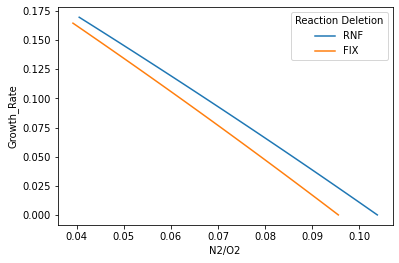

In [10]:
react_list = ["RNF", "FIX"]
reduction_ratio_NDHI("../Data/Models/iAA1300_C.json", react_list, 0,10, 50  )